# Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()

# 0. Anscombe's Quartet

Perhaps the most elegant demonstration of the dangers of summary statistics is Anscombe’s Quartet. It’s a group of four data sets that appear to be similar when using typical summary statistics, yet tell four different stories when graphed. Each data set consists of eleven $(x,y)$ pairs. 

Run the cell below to load the data sets.

In [2]:
anscombe = pd.read_csv("anscombes.csv")
anscombe

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33
5,5,I,14.0,9.96
6,6,I,6.0,7.24
7,7,I,4.0,4.26
8,8,I,12.0,10.84
9,9,I,7.0,4.82


The numerical summaries reveal that all the data sets are similar.

- The average $x$ value is 9 for each dataset
- The average $y$ value is 7.50 for each dataset
- The variance for $x$ is 11 and the variance for $y$ is 4.12

In [3]:
mean_x = []
mean_y = []
sd_x = []
sd_y = []

mean_x = anscombe.groupby('dataset').agg(np.mean)['x'].tolist()
mean_y = anscombe.groupby('dataset').agg(np.mean)['y'].tolist()
sd_x = anscombe.groupby('dataset').agg(np.std)['x'].tolist()
sd_y = anscombe.groupby('dataset').agg(np.std)['y'].tolist()

- The correlation between $x$ and $y$ is 0.816 for each dataset

In [ ]:
corr_coef = []

for i in ['I', 'II', 'III', 'IV']:
    corr_coef.append(anscombe[anscombe.dataset == i][['x', 'y']].corr().iloc[0]['y'])

So far these four datasets appear to be pretty similar. But when we plot these four data sets on an $x$/$y$ coordinate plane, we get the following results:

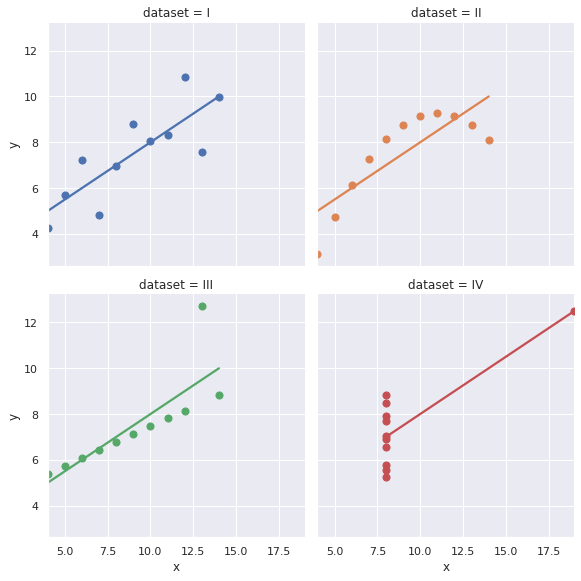

In [5]:
sns.lmplot(x = "x", 
           y = "y", 
           col = "dataset", 
           hue = "dataset", 
           data = anscombe, 
           col_wrap = 2, 
           ci = None, 
           height = 4, 
           scatter_kws = {"s":50, "alpha":1});

Now we see the real relationships in the datasets start to emerge. 

- Dataset I consists of a set of points that appear to follow a rough linear relationship with some variance. 

- Dataset II fits a neat curve but doesn’t follow a linear relationship. It appears to be quadratic. 

- Dataset III looks like a tight linear relationship between $x$ and $y$, except for one large outlier. 

- Dataset IV looks like $x$ remains constant, except for one outlier as well.

Computing summary statistics or staring at the data wouldn’t have told us any of these stories. Instead, it’s important to visualize the data to get a clear picture of what’s going on.

## 1. Bar Plots

- We often use bar plots to display distributions of a (qualitative) categorical variable

- Widths of the bars are meaningless

In [7]:
birth_weights = pd.read_csv('birth_weights.csv')
birth_weights.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [8]:
birth_weights['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

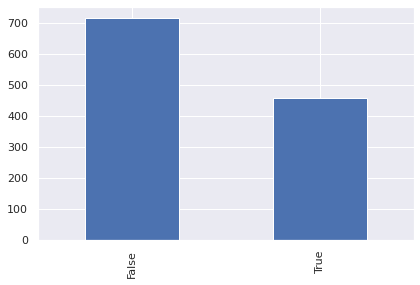

In [9]:
birth_weights['Maternal Smoker'].value_counts().plot(kind = 'bar');

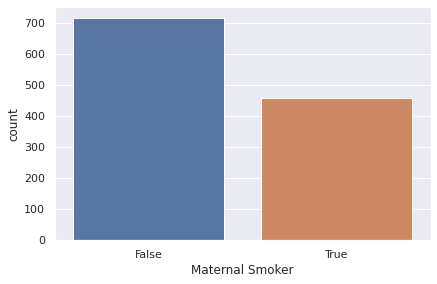

In [10]:
sns.countplot(x = birth_weights['Maternal Smoker']);

- They are also used to display a (quantitative) numberical variable measured on individuals from different groups (i.e. categories).

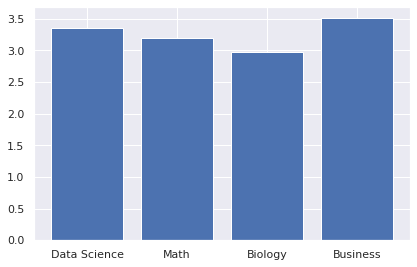

In [11]:
majors = ['Data Science', 'Math', 'Biology', 'Business']
gpas = [3.35, 3.20, 2.98, 3.51]
plt.bar(majors, gpas);

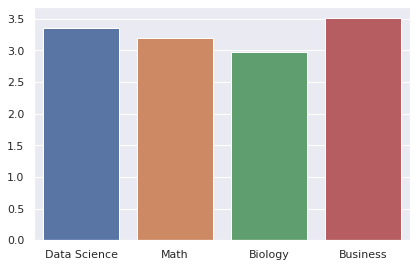

In [12]:
sns.barplot(x = majors, y = gpas);

## 2. Rug plots

- Rug plots are used for visualizing a single (quantitative) numerical variable

- Rug plots are granular (i.e. show us each and every value)

In [13]:
b_weights_series = birth_weights["Birth Weight"]
b_weights_series

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

- Issues with rug plots include

  - Too much detail

  - Hard to see the big picture

  - Overplotting

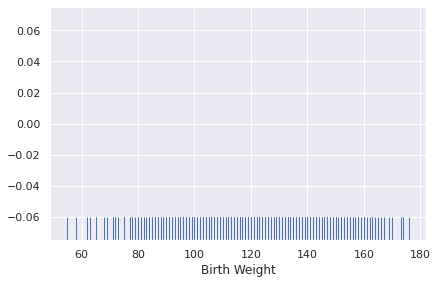

In [15]:
sns.rugplot(b_weights_series, height = .1);

## 3. Histograms

- A histogram can be thought of as a smooth version of a rug plot

- Lose granularity, but gain interpretability

- The horizontal axis is dvivided into bins

- Bin width has meaning

  - Area corresponds to proportion
  
  - Proportion in bin = Width of bin $\times$ Height of bar
  
  - Units of height - proportion per unit on the $x-$axis

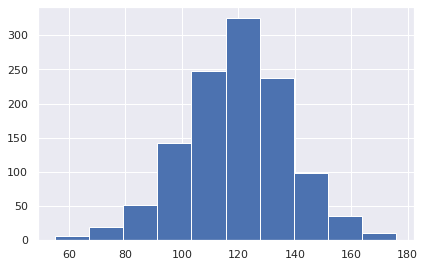

In [16]:
plt.hist(b_weights_series);

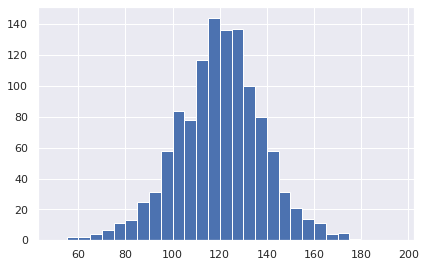

In [17]:
b_weights_bins = range(50, 200, 5)
plt.hist(b_weights_series, bins = b_weights_bins);

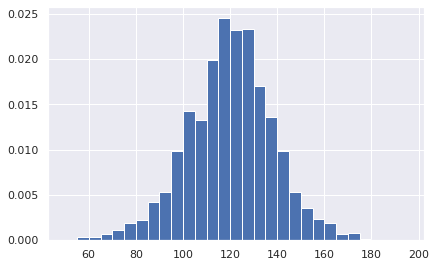

In [18]:
plt.hist(b_weights_series, density = True, bins = b_weights_bins);

In [ ]:
plt.hist(b_weights_series, bins = np.arange(50, 200, 20), density = True);

## 4. Density Curves

- A density curve can be thought of as a smoothed out histogram

- A general idea of the distribution

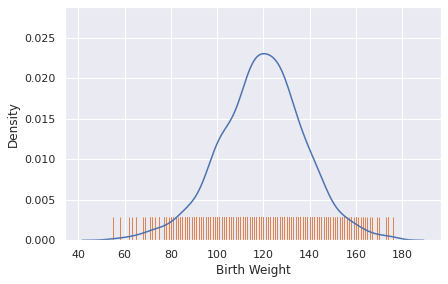

In [23]:
sns.displot(x = b_weights_series, kind = 'kde');

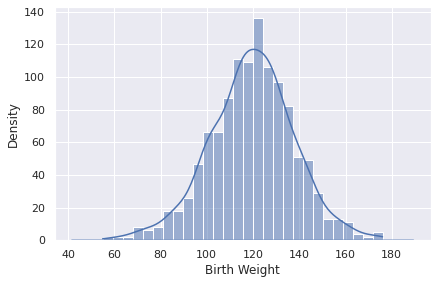

In [25]:
sns.displot(x = b_weights_series, kind = "hist");

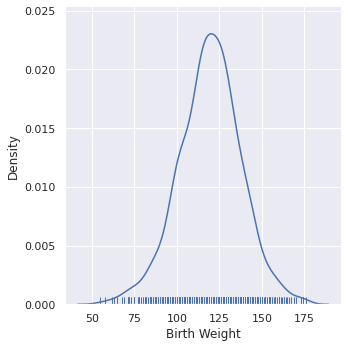

In [21]:
sns.displot(x = b_weights_series, kind = "kde", rug = True);

Overlaid histograms and density curve.

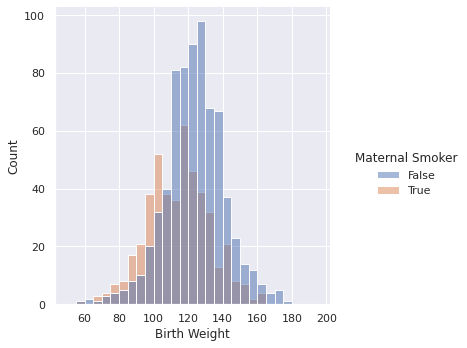

In [26]:
sns.displot(data = birth_weights, x = 'Birth Weight', bins = b_weights_bins, hue = 'Maternal Smoker');

## 6. Describing Distributions

Terminology used to describe distributions

- Mode

  - Local or global maximum


- Skewness

  - Skewed left or skewed right
  
  - If a distribution has a long left tail, we call it skewed left
  
  - If a distribution has a long right tail, we call it skewed right
  
  
 <img src='skewness.png' width = "500px" height = "300px" class = "center"/>


- Tail

  - Left tail or right tailed
  
  - If both tails are roughly equal then the distribuyion can be symmetric
  
- Outliers

  - Later

## 6. Quartiles

<img src='quartiles.png' width = "400px" height = "200px" class = "center"/>

For a quantitative variable

- First or lower quartile is the 25$^{\text{th}}$ percentile

- Second quartile is the 50$^{\text{th}}$ percentile (median)

- Third or upper quartile is the 75$^{\text{th}}$ percentile

- The interval from the firat quartile to the third quartile contains the middle 50% of the the data

- The Interquartile Range (IQR) measures the spread of the data 

  - IQR = third quartile $-$ first quartile
  
  
## 7. Box Plots

<img src='boxplot.png' width = "500px" height = "300px" class = "center"/>

- Box plots summarize several of the characteristics of a numerical distribution

  - Lower quartile
  
  - Median
  
  - Upper quartile
  
  - Whiskers
  
    - Placed at the lower quartile $-$ 1.5 $\times$ IQR and at the upper quartile $+$ 1.5 $\times$ IQR
    
  - Outliers
  
    - Data that is further than 1.5 $\times$ IQR from the extreme quartiles (arbitrary)

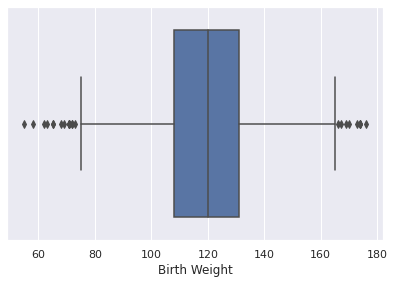

In [27]:
sns.boxplot(x = b_weights_series);

In [ ]:
q1 = np.percentile(b_weights_series, 25)
q2 = np.percentile(b_weights_series, 50)
q3 = np.percentile(b_weights_series, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2